In [0]:
! nvidia-smi

Fri May 15 09:40:43 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.82       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P8    27W / 149W |      0MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import os
import glob
import argparse
import matplotlib
from zipfile import ZipFile
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import io
import skimage
from skimage.transform import resize
from itertools import groupby
import cv2
from tqdm.auto import tqdm
from pathlib import Path
from time import time
from datetime import datetime 
import gc
sns.set()
from numpy import asarray

In [0]:
log_fg_bg = open('/content/gdrive/My Drive/EVA4P1_S15/FG_BG_Mask_Depth/FG_BG_Filename_Logs.txt',"r")

In [0]:
lst = []
for i in range(10): 
    x = np.random.randint(low=1, high=400000, size=1)[0]
    lst.append(x)
lst

[342812,
 143895,
 108999,
 117670,
 210162,
 298207,
 199225,
 163511,
 173086,
 302151]

In [0]:
content_list = log_fg_bg.readlines()

In [0]:
FG_BG_zip     =  ZipFile("/content/gdrive/My Drive/EVA4P1_S15/FG_BG_Mask_Depth/FG_BG_400K.zip", 'r')


In [0]:
BG_Depth_zip=Zipfile("/content/gdrive/My Drive/EVA4P1_S15/FG_BG_Mask_Depth/BG_BGFlip_Depth.zip", 'r')

NameError: ignored

In [0]:
FG_BG_zip     =  ZipFile("/content/gdrive/My Drive/EVA4P1_S15/FG_BG_Mask_Depth/FG_BG_400K.zip", 'r')
BG_Depth_zip  =  Zipfile("/content/gdrive/My Drive/EVA4P1_S15/FG_BG_Mask_Depth/BG_BGFlip_Depth.zip", 'r')

FG_BG_zip_files = [info.filename for info in FG_BG_zip.infolist() if not info.is_dir()]
BG_Depth_files  = [info.filename for info in BG_Depth_zip.infolist() if not info.is_dir()]
print('len(FG_BG_zip_files)',len(FG_BG_zip_files))
print('len(BG_Depth_files)',len(BG_Depth_files))
print('FG_BG files naming format:', FG_BG_zip_files[0])
print('BG files naming format   :', BG_Depth_files[0:2])

NameError: ignored

In [0]:
path_
for i in range(len(lst)):


In [0]:
len(content_list)

400000

In [0]:
content_list[0]

'Img_fg_bg_1.jpg,Img21.jpg,Image41.png,(192, 192, 108, 156, 51, 3, 159, 3, 51, 159, 159, 159)\n'

In [0]:
lst = content_list[0].split(',')

In [0]:
lst

['Img_fg_bg_1.jpg',
 'Img21.jpg',
 'Image41.png',
 '(192',
 ' 192',
 ' 108',
 ' 156',
 ' 51',
 ' 3',
 ' 159',
 ' 3',
 ' 51',
 ' 159',
 ' 159',
 ' 159)\n']

In [0]:
image_bg_depth = cv2.imread('/content/gdrive/My Drive/Img70_depth.jpg',0)

In [0]:
image_bg_depth.shape

(200, 200)

In [0]:
image_fg_bg_depth = cv2.imread('/content/gdrive/My Drive/Img_fg_bg_155634_depth.jpg',0)

In [0]:
image_fg_bg_depth.shape

(200, 200)

In [0]:
delta_image = image_fg_bg_depth - image_bg_depth

In [0]:
delta_image.shape

(200, 200)

In [0]:
from google.colab.patches import cv2_imshow

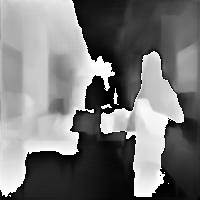

In [0]:
cv2_imshow(delta_image)

In [0]:
contour_image = delta_image.copy()
contour_image.shape

(200, 200)

In [0]:
ret, thresh = cv2.threshold(contour_image, 127, 255, 0)

In [0]:
#contours, _ = cv2.findContours(countour_image,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE) 
contours, _ = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE) 

In [0]:
len(contours)

14

In [0]:
out_mask = np.zeros_like(contour_image)
out_mask.shape

(200, 200)

In [0]:
cv2.drawContours(out_mask, contours,-1, 255, cv2.FILLED)

array([[255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

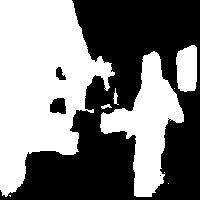

In [0]:
cv2_imshow(out_mask)